# **CUSTOMER SEGMENTATION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
df=pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
print(df.head(10))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


/tmp/ipython-input-2499177124.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel', edgecolor='black')


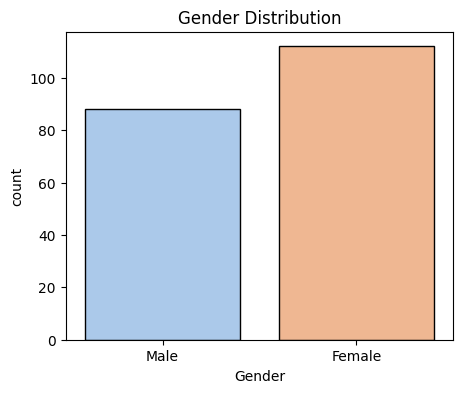

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='Gender', data=df, palette='pastel', edgecolor='black')
plt.title("Gender Distribution")
plt.show()


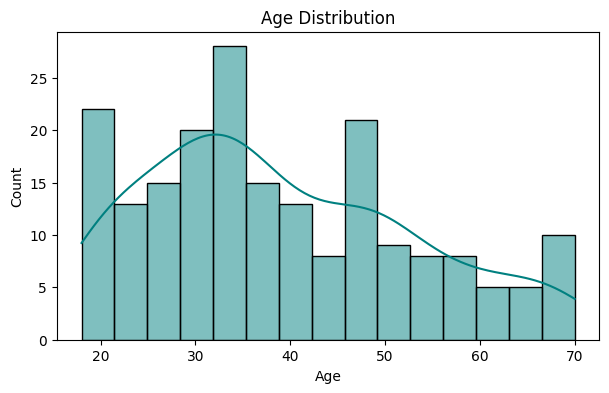

In [ ]:
# ------------------------------------------
plt.figure(figsize=(7,4))
sns.histplot(df['Age'], bins=15, kde=True, color='teal')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

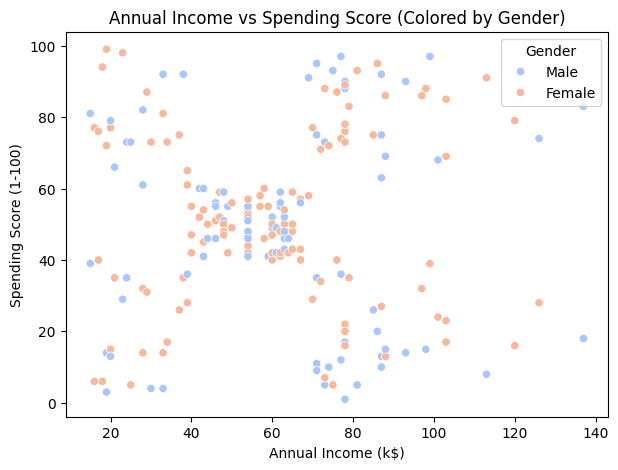

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender', palette='coolwarm')
plt.title("Annual Income vs Spending Score (Colored by Gender)")
plt.show()

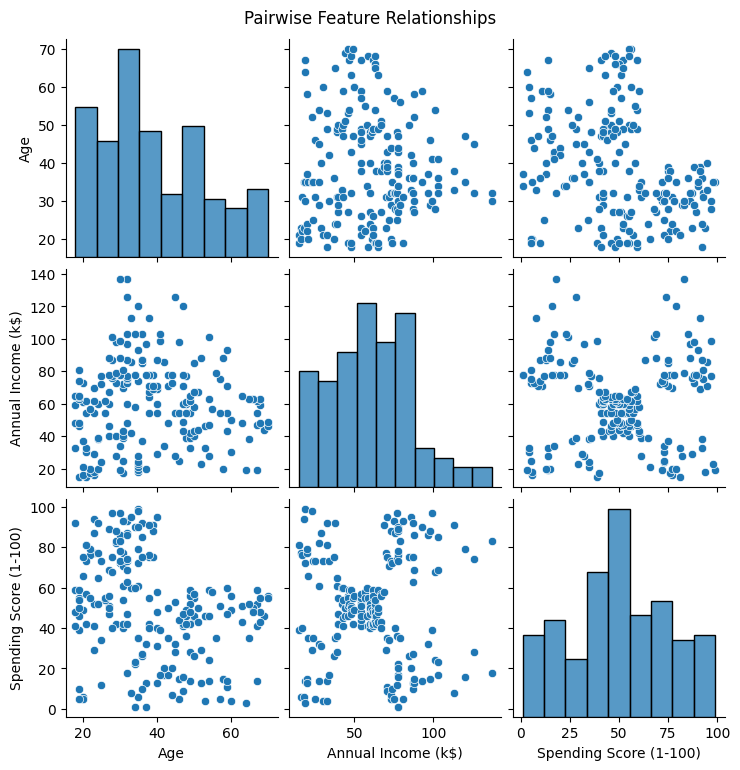

In [ ]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


In [ ]:
df[['Annual Income (k$)', 'Spending Score (1-100)']].corr()

,Annual Income (k$),Spending Score (1-100)
Annual Income (k$),1.000000,0.009903
Spending Score (1-100),0.009903,1.000000


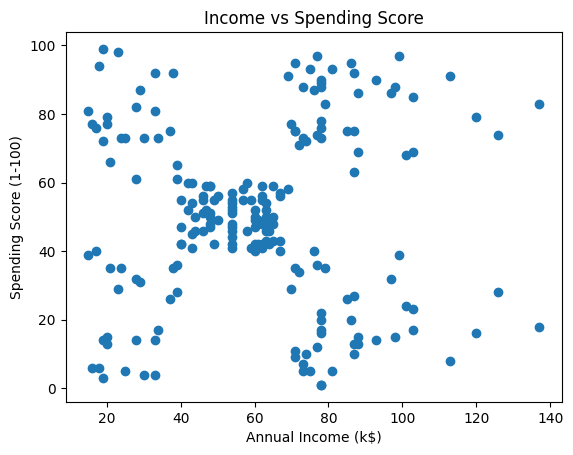

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Income vs Spending Score')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns for scaling
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[num_cols])

# Convert back to DataFrame
df_scaled_standard = pd.DataFrame(scaled_data, columns=num_cols)

df_scaled_standard.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [ ]:
X = df_scaled_standard
 # scaled dataset

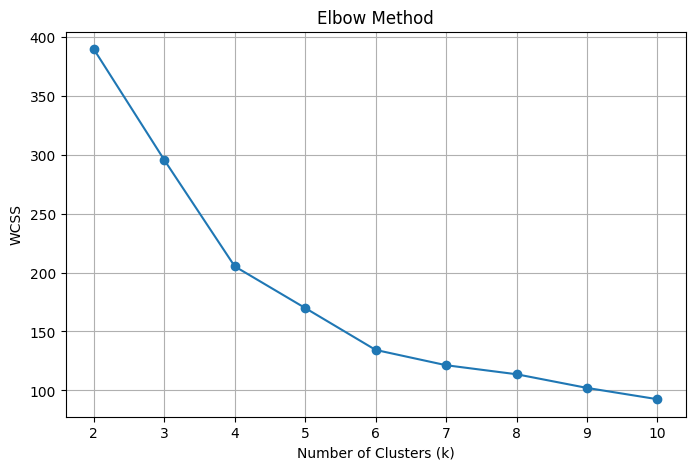

In [ ]:
wcss = []

for k in range(2, 11):   # testing clusters from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia = WCSS

# Plot
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


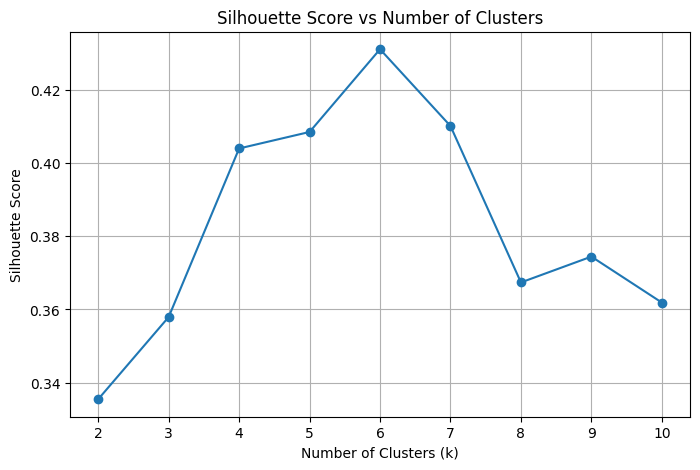

In [ ]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to DataFrame
df['Cluster'] = clusters
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,5
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5


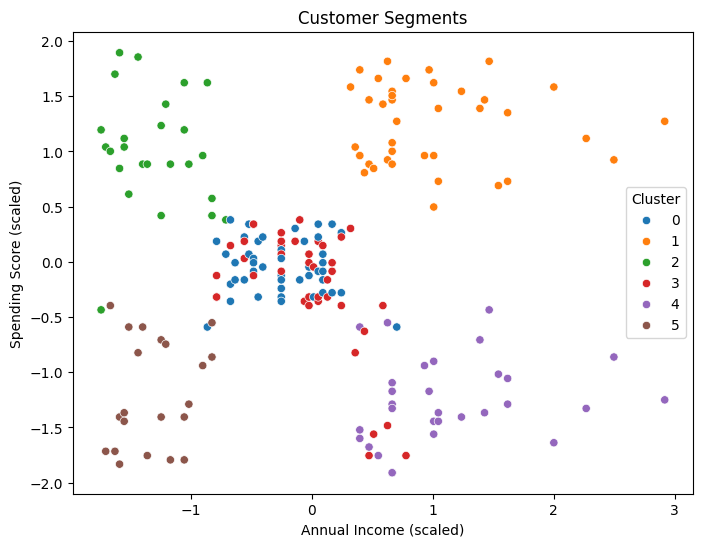

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df_scaled_standard['Annual Income (k$)'],
    y=df_scaled_standard['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='tab10'
)
plt.title("Customer Segments")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()


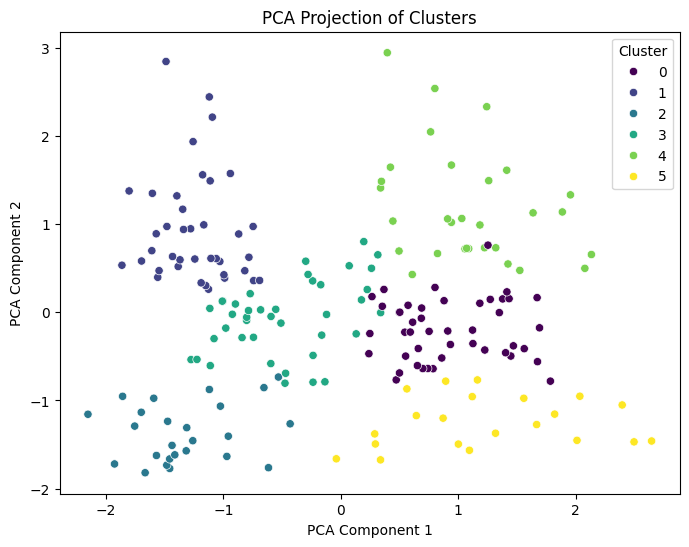

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=pca_data[:,0],
    y=pca_data[:,1],
    hue=df['Cluster'],
    palette='viridis'
)
plt.title("PCA Projection of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


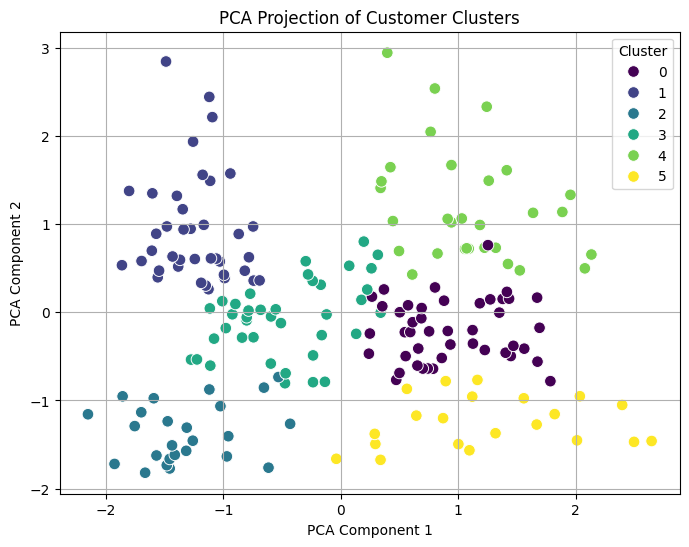

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Perform PCA (2 components)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

# Create PCA dataframe for visualization
pca_df = pd.DataFrame({
    'PCA1': pca_data[:, 0],
    'PCA2': pca_data[:, 1],
    'Cluster': df['Cluster']
})

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='viridis',
    s=70
)
plt.title("PCA Projection of Customer Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()



In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

cluster_stats = df.groupby("Cluster")[numeric_cols].mean()

cluster_stats




,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,83.777778,56.333333,54.266667,49.066667
1,162.000000,32.692308,86.538462,82.128205
2,24.200000,25.560000,26.480000,76.240000
3,97.700000,26.125000,59.425000,44.450000
4,167.066667,44.000000,90.133333,17.933333
5,23.190476,45.523810,26.285714,19.380952


In [ ]:
df.groupby("Cluster")['Gender'].value_counts(normalize=True)



Cluster  Gender
0        Female    0.577778
         Male      0.422222
1        Female    0.538462
         Male      0.461538
2        Female    0.560000
         Male      0.440000
3        Female    0.600000
         Male      0.400000
4        Male      0.533333
         Female    0.466667
5        Female    0.619048
         Male      0.380952
Name: proportion, dtype: float64

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
cluster_stats = df.groupby("Cluster")[numeric_cols].mean()
cluster_stats


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,83.777778,56.333333,54.266667,49.066667
1,162.000000,32.692308,86.538462,82.128205
2,24.200000,25.560000,26.480000,76.240000
3,97.700000,26.125000,59.425000,44.450000
4,167.066667,44.000000,90.133333,17.933333
5,23.190476,45.523810,26.285714,19.380952
